In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=cdfbace787d812febea91e11712f53ab6ff889d5c87f1c292f3e753bab80439a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

New Antecedent/Consequent objects hold universe variables and membership functions

In [3]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

Auto-membership function population is possible with .automf(3, 5, or 7)

In [4]:
quality.automf(3)
service.automf(3)

Custom membership functions can be built interactively with a familiar, Pythonic API

In [5]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

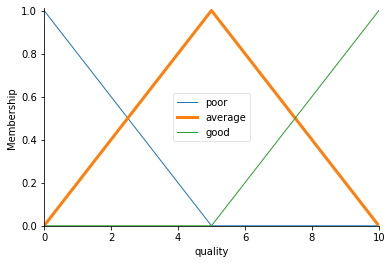

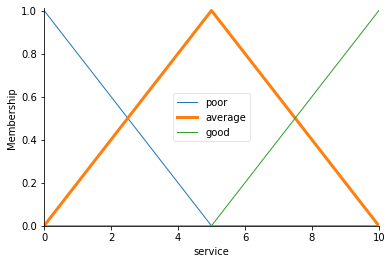

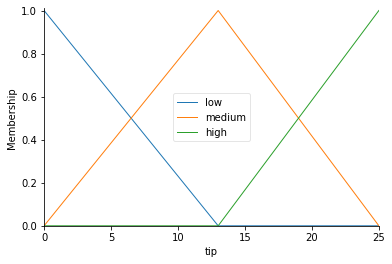

In [6]:
# You can see how these look with .view()
quality['average'].view()
service['average'].view()
tip.view()

Rules definition

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe66913e810>)

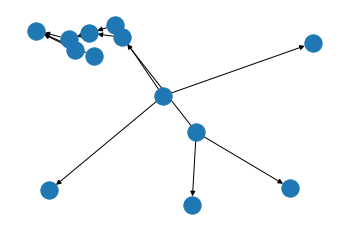

In [7]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

Control System

In [8]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Pass inputs to the ControlSystem using Antecedent labels with Pythonic API

In [9]:
tipping.input['quality'] = 8
tipping.input['service'] = 3

Crunch the numbers

Tip:  13.32


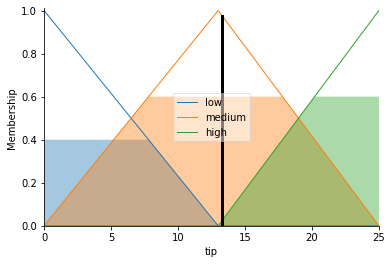

In [13]:
# Crunch the numbers
tipping.compute()
print("Tip: ", round(tipping.output['tip'],2))
tip.view(sim=tipping)
